# Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import warnings
#suppress warning
warnings.filterwarnings('ignore')
import collections
import json
import string

from pycocotools.coco import COCO

import numpy as np
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
annotations='/content/drive/MyDrive/Image_Captioning/Dataset/coco2017/annotations/captions_train2017.json'
image_directory='/content/drive/MyDrive/train2017'

## Understanding the Annotation json data

In [ ]:
#reading json
with open(annotations,'r') as f:
  annotation_loaded=json.load(f)

In [ ]:
#number of captions
len(annotation_loaded['images'])

118287

In [ ]:
f"{annotation_loaded['annotations'][2]['image_id']:012}.jpg" # changing the image IDs to the same interger length as in the image path

'000000016977.jpg'

In [ ]:
#extracting captions
annotation_text=[]
for i in range(0,10):
  annotation_text.append(annotation_loaded['annotations'][i]['caption'])

In [ ]:
#same image ID has multiple captions in the dataset
for i in annotation_loaded['annotations']:
   if i['image_id'] == 260409:
    print(i['caption'])

A person in a helmet standing by their motorcycle.
A motorcyclist stands next to a motorcycle at a lookout over a beach.
A person with his motorcycle by the ocean.
A person posing next to their motorcycle by the shore.
A motorcyclist in his helmet parked along side a road near the ocean


In [ ]:
# formatted captions - change all to lower case and remove punctuations
punctuation_removal=str.maketrans('','',string.punctuation)
words=[word.lower().translate(punctuation_removal) for word in annotation_text]
print(words)

['a bicycle replica with a clock as the front wheel', 'a room with blue walls and a white sink and door', 'a car that seems to be parked illegally behind a legally parked car', 'a large passenger airplane flying through the air', 'there is a gol plane taking off in a partly cloudy sky', 'blue and white color scheme in a small bathroom', 'this is a blue and white bathroom with a wall sink and a lifesaver on the wall', 'a blue boat themed bathroom with a life preserver on the wall', 'the bike has a clock as a tire', 'two cars parked on the sidewalk on the street']


In [ ]:
#checking one instance of the extracted list
annotation_text[3]

'A large passenger airplane flying through the air.'

In [ ]:
# checking how to clean the text data the best way
v="You are beautiful."
t = [word.lower().translate(punctuation_removal) for word in v.split()]
print(' '.join(t))

you are beautiful


#### Writing functions to format the annotation text and create dictionaries to store in organized manner.

In [ ]:
# Function for loading json data
def loading_json_data(annotations):
  with open(annotations, 'r') as annotation:
    annotation_json=json.load(annotation)
  return annotation_json

# Formatting captions - changing to lower case and removing captions
def annotation_json_formatting(caption):
  punctuation_removal=str.maketrans('','',string.punctuation)
  caption = [word.lower().translate(punctuation_removal) for word in caption.split()]
  return ' '.join(caption)

# Storing the formatted caption and metadata in a collection dictionary
def annnotated_data_storage(annotations):
  annotation_json=loading_json_data(annotations)
  #print(annotation_json['annotations'][3])
  Oraganized_data=collections.defaultdict(list)
  for item in annotation_json['annotations']:
    formatted_caption= annotation_json_formatting(item['caption'])
    #print(formatted_caption)
    image_filename= f"{item['image_id']:012}.jpg"
    image_path= os.path.join(image_directory,image_filename)
    # creating a deafultdict in list format storing the image paths and respective captions
    Oraganized_data[image_path].append(formatted_caption)
  return dict(Oraganized_data)

In [ ]:
# organizing data and storing as a dictionary
Oraganized_imagepath_captions=annnotated_data_storage(annotations)

#### Function to create image ID

In [ ]:
# Mapping Image IDs to the Oragnized default dict

def path_to_image_id_mapping(caption_collection):
    Mapping=collections.defaultdict(list)
    for img_path, captions_list in caption_collection.items():
        img_identifier = os.path.basename(img_path).rstrip('.jpg')
        Mapping[img_identifier] = captions_list
    return dict(Mapping)

# Substituiting Image paths with Image ID
Final_data = path_to_image_id_mapping(Oraganized_imagepath_captions)
# extracting all the image ids and storing
ImageIDs = list(Final_data.keys())
# extracting all the images and storing
ImagePaths = list(Oraganized_imagepath_captions.keys())

In [ ]:
# fetching a random image and it's respective captions
import random
#randon image and it's path
imgPth= random.choice(ImagePaths)
Captionrnd = Oraganized_imagepath_captions[imgPth]

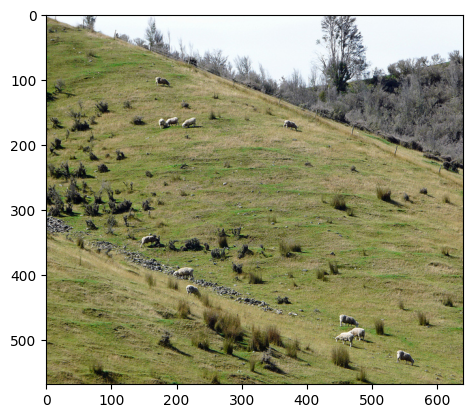

In [ ]:
# Displaying the image and the captions related to it as title
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img=mpimg.imread(imgPth)
plt.imshow(img)

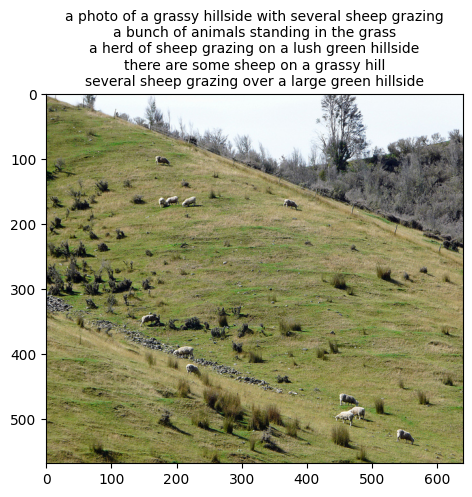

In [ ]:
#printing captions as title
caption_title = "\n".join(Captionrnd)
plt.title(caption_title,fontsize= 10)
plt.imshow(img)